In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
more_train=pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
more_test=pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
train_df=pd.concat([train,more_train])
train.shape,more_train.shape,train_df.shape

((11504798, 12), (381109, 12), (11885907, 12))

In [6]:
test_df=pd.concat([test,more_test])
test.shape,more_test.shape,test_df.shape

((7669866, 11), (127037, 11), (7796903, 11))

In [7]:
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', inplace=True)

In [8]:
train_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
test_df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [10]:
train_df.Response.value_counts()

Response
0    10424138
1     1461769
Name: count, dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11885907 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ GB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7796903 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 654.3+ MB


In [13]:
train_df.describe().drop('count')

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
mean,38.397640,0.998017,26.417732,0.462843,30464.673611,112.412900,163.591522,0.122983
std,15.010549,0.044486,12.999299,0.498617,16479.613681,54.041153,80.118209,0.328418
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,24.000000,1.000000,15.000000,0.000000,25256.000000,29.000000,98.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31820.000000,151.000000,166.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39450.000000,152.000000,232.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [14]:
train_df.Gender.value_counts(),train_df.Vehicle_Age.value_counts(),train_df.Vehicle_Damage.value_counts()

(Gender
 Male      6434223
 Female    5451684
 Name: count, dtype: int64,
 Vehicle_Age
 1-2 Year     6182994
 < 1 Year     5208931
 > 2 Years     493982
 Name: count, dtype: int64,
 Vehicle_Damage
 Yes    5975642
 No     5910265
 Name: count, dtype: int64)

In [15]:
def converting_datatypes(df):
    df = df.copy()
    try:
        df['Gender'] = df['Gender'].astype('category')
        df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
        df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('category')
        df['Age'] = df['Age'].astype('int8')
        df['Driving_License'] = df['Driving_License'].astype('int8')
        df['Region_Code'] = df['Region_Code'].astype('int8')
        df['Previously_Insured'] = df['Previously_Insured'].astype('int8')
        df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
        df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int16')
        df['Vintage'] = df['Vintage'].astype('int16')
        df['Response'] = df['Response'].astype('int8')
        print(df.info(memory_usage='deep'))
    except KeyError as e:
        print(f"Error: {e} not found in DataFrame")
    except Exception as e:
        print(f"An error occurred: {e}")
    return df

In [16]:
train_df=converting_datatypes(train_df)
test_df=converting_datatypes(test_df)

<class 'pandas.core.frame.DataFrame'>
Index: 11885907 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Gender                category
 1   Age                   int8    
 2   Driving_License       int8    
 3   Region_Code           int8    
 4   Previously_Insured    int8    
 5   Vehicle_Age           category
 6   Vehicle_Damage        category
 7   Annual_Premium        int32   
 8   Policy_Sales_Channel  int16   
 9   Vintage               int16   
 10  Response              int8    
dtypes: category(3), int16(2), int32(1), int8(5)
memory usage: 272.0 MB
None
Error: 'Response' not found in DataFrame


In [17]:
train_df = pd.get_dummies(train_df, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])
test_df = pd.get_dummies(test_df, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11885907 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                 Dtype
---  ------                 -----
 0   Age                    int8 
 1   Driving_License        int8 
 2   Region_Code            int8 
 3   Previously_Insured     int8 
 4   Annual_Premium         int32
 5   Policy_Sales_Channel   int16
 6   Vintage                int16
 7   Response               int8 
 8   Gender_Female          bool 
 9   Gender_Male            bool 
 10  Vehicle_Age_1-2 Year   bool 
 11  Vehicle_Age_< 1 Year   bool 
 12  Vehicle_Age_> 2 Years  bool 
 13  Vehicle_Damage_No      bool 
 14  Vehicle_Damage_Yes     bool 
dtypes: bool(7), int16(2), int32(1), int8(5)
memory usage: 317.4 MB


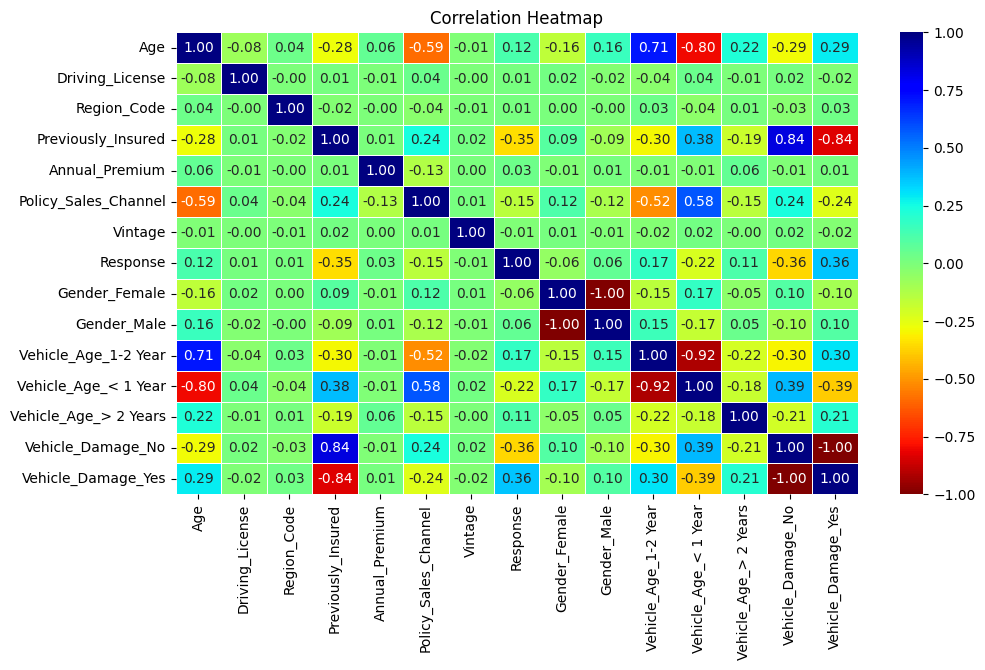

In [19]:
plt.figure(figsize=(11, 6)) 
sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.jet_r, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
train_df.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
Age,1.000000,-0.078564,0.037225,-0.275533,0.056718,-0.590980,-0.012982,0.121765,-0.157255,0.157255,0.708456,-0.802196,0.220901,-0.287271,0.287271
Driving_License,-0.078564,1.000000,-0.001321,0.013775,-0.007460,0.042968,-0.000689,0.009229,0.018690,-0.018690,-0.036423,0.039245,-0.006391,0.015598,-0.015598
Region_Code,0.037225,-0.001321,1.000000,-0.022441,-0.002043,-0.037763,-0.005432,0.012743,0.000082,-0.000082,0.033273,-0.039291,0.014390,-0.026525,0.026525
Previously_Insured,-0.275533,0.013775,-0.022441,1.000000,0.007549,0.236278,0.018897,-0.345777,0.087432,-0.087432,-0.296811,0.376170,-0.192206,0.835827,-0.835827
Annual_Premium,0.056718,-0.007460,-0.002043,0.007549,1.000000,-0.128042,0.003124,0.031935,-0.010417,0.010417,-0.011923,-0.010284,0.055413,-0.012616,0.012616
Policy_Sales_Channel,-0.590980,0.042968,-0.037763,0.236278,-0.128042,1.000000,0.008722,-0.152293,0.115900,-0.115900,-0.515781,0.579385,-0.149283,0.240501,-0.240501
Vintage,-0.012982,-0.000689,-0.005432,0.018897,0.003124,0.008722,1.000000,-0.014696,0.009294,-0.009294,-0.017045,0.018607,-0.003590,0.018824,-0.018824
Response,0.121765,0.009229,0.012743,-0.345777,0.031935,-0.152293,-0.014696,1.000000,-0.055124,0.055124,0.173149,-0.219204,0.111527,-0.359607,0.359607
Gender_Female,-0.157255,0.018690,0.000082,0.087432,-0.010417,0.115900,0.009294,-0.055124,1.000000,-1.000000,-0.153755,0.173044,-0.045319,0.096816,-0.096816
Gender_Male,0.157255,-0.018690,-0.000082,-0.087432,0.010417,-0.115900,-0.009294,0.055124,-1.000000,1.000000,0.153755,-0.173044,0.045319,-0.096816,0.096816


In [21]:
train_df['Previously_Insured_Annual_Premium'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Annual_Premium'].astype(str))[0]

In [22]:
train_df['Previously_Insured_Vehicle_Age_1_2_Year'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Vehicle_Age_1-2 Year'].astype(str))[0]
train_df['Previously_Insured_Vehicle_Age_<_1_Year'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Vehicle_Age_< 1 Year'].astype(str))[0]
train_df['Previously_Insured_Vehicle_Age_>_2_Years'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Vehicle_Age_> 2 Years'].astype(str))[0]

In [23]:
train_df['Previously_Insured_Vehicle_Damage_No'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Vehicle_Damage_No'].astype(str))[0]
train_df['Previously_Insured_Vehicle_Damage_Yes'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Vehicle_Damage_Yes'].astype(str))[0]

In [24]:
train_df['Previously_Insured_Vintage'] = pd.factorize(train_df['Previously_Insured'].astype(str) + train_df['Vintage'].astype(str))[0]

In [25]:
train_df['Age_Vehicle_Age_1_2_Year'] = pd.factorize(train_df['Age'].astype(str) + train_df['Vehicle_Age_1-2 Year'].astype(str))[0]
train_df['Age_Vehicle_Age_<_1_Year'] = pd.factorize(train_df['Age'].astype(str) + train_df['Vehicle_Age_< 1 Year'].astype(str))[0]
train_df['Age_Vehicle_Age_>_2_Years'] = pd.factorize(train_df['Age'].astype(str) + train_df['Vehicle_Age_> 2 Years'].astype(str))[0]

In [26]:
train_df['Age_Response'] = pd.factorize(train_df['Age'].astype(str) + train_df['Response'].astype(str))[0]

In [27]:
train_df['Vehicle_Age_1_2_Year_Vehicle_Damage_No'] = pd.factorize(train_df['Vehicle_Age_1-2 Year'].astype(str) + train_df['Vehicle_Damage_No'].astype(str))[0]
train_df['Vehicle_Age_1_2_Year_Vehicle_Damage_Yes'] = pd.factorize(train_df['Vehicle_Age_1-2 Year'].astype(str) + train_df['Vehicle_Damage_Yes'].astype(str))[0]
train_df['Vehicle_Age_<_1_Year_Vehicle_Damage_No'] = pd.factorize(train_df['Vehicle_Age_< 1 Year'].astype(str) + train_df['Vehicle_Damage_No'].astype(str))[0]
train_df['Vehicle_Age_<_1_Year_Vehicle_Damage_Yes'] = pd.factorize(train_df['Vehicle_Age_< 1 Year'].astype(str) + train_df['Vehicle_Damage_Yes'].astype(str))[0]
train_df['Vehicle_Age_>_2_Years_Vehicle_Damage_No'] = pd.factorize(train_df['Vehicle_Age_> 2 Years'].astype(str) + train_df['Vehicle_Damage_No'].astype(str))[0]
train_df['Vehicle_Age_>_2_Years_Vehicle_Damage_Yes'] = pd.factorize(train_df['Vehicle_Age_> 2 Years'].astype(str) + train_df['Vehicle_Damage_Yes'].astype(str))[0]

In [28]:
test_df['Previously_Insured_Annual_Premium'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Annual_Premium'].astype(str))[0]
test_df['Previously_Insured_Vehicle_Age_1_2_Year'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Vehicle_Age_1-2 Year'].astype(str))[0]
test_df['Previously_Insured_Vehicle_Age_<_1_Year'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Vehicle_Age_< 1 Year'].astype(str))[0]
test_df['Previously_Insured_Vehicle_Age_>_2_Years'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Vehicle_Age_> 2 Years'].astype(str))[0]
test_df['Previously_Insured_Vehicle_Damage_No'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Vehicle_Damage_No'].astype(str))[0]
test_df['Previously_Insured_Vehicle_Damage_Yes'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Vehicle_Damage_Yes'].astype(str))[0]
test_df['Previously_Insured_Vintage'] = pd.factorize(test_df['Previously_Insured'].astype(str) + test_df['Vintage'].astype(str))[0]
test_df['Age_Vehicle_Age_1_2_Year'] = pd.factorize(test_df['Age'].astype(str) + test_df['Vehicle_Age_1-2 Year'].astype(str))[0]
test_df['Age_Vehicle_Age_<_1_Year'] = pd.factorize(test_df['Age'].astype(str) + test_df['Vehicle_Age_< 1 Year'].astype(str))[0]
test_df['Age_Vehicle_Age_>_2_Years'] = pd.factorize(test_df['Age'].astype(str) + test_df['Vehicle_Age_> 2 Years'].astype(str))[0]
test_df['Vehicle_Age_1_2_Year_Vehicle_Damage_No'] = pd.factorize(test_df['Vehicle_Age_1-2 Year'].astype(str) + test_df['Vehicle_Damage_No'].astype(str))[0]
test_df['Vehicle_Age_1_2_Year_Vehicle_Damage_Yes'] = pd.factorize(test_df['Vehicle_Age_1-2 Year'].astype(str) + test_df['Vehicle_Damage_Yes'].astype(str))[0]
test_df['Vehicle_Age_<_1_Year_Vehicle_Damage_No'] = pd.factorize(test_df['Vehicle_Age_< 1 Year'].astype(str) + test_df['Vehicle_Damage_No'].astype(str))[0]
test_df['Vehicle_Age_<_1_Year_Vehicle_Damage_Yes'] = pd.factorize(test_df['Vehicle_Age_< 1 Year'].astype(str) + test_df['Vehicle_Damage_Yes'].astype(str))[0]
test_df['Vehicle_Age_>_2_Years_Vehicle_Damage_No'] = pd.factorize(test_df['Vehicle_Age_> 2 Years'].astype(str) + test_df['Vehicle_Damage_No'].astype(str))[0]
test_df['Vehicle_Age_>_2_Years_Vehicle_Damage_Yes'] = pd.factorize(test_df['Vehicle_Age_> 2 Years'].astype(str) + test_df['Vehicle_Damage_Yes'].astype(str))[0]

In [29]:
train_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,...,Age_Vehicle_Age_1_2_Year,Age_Vehicle_Age_<_1_Year,Age_Vehicle_Age_>_2_Years,Age_Response,Vehicle_Age_1_2_Year_Vehicle_Damage_No,Vehicle_Age_1_2_Year_Vehicle_Damage_Yes,Vehicle_Age_<_1_Year_Vehicle_Damage_No,Vehicle_Age_<_1_Year_Vehicle_Damage_Yes,Vehicle_Age_>_2_Years_Vehicle_Damage_No,Vehicle_Age_>_2_Years_Vehicle_Damage_Yes
0,21,1,35,0,65101,124,187,0,False,True,...,0,0,0,0,0,0,0,0,0,0
1,43,1,28,0,58911,26,288,1,False,True,...,1,1,1,1,1,1,0,0,1,1
2,25,1,14,1,38043,152,254,0,True,False,...,2,2,2,2,2,2,1,1,2,2
3,35,1,1,0,2630,156,76,0,True,False,...,3,3,3,3,0,0,0,0,0,0
4,36,1,15,1,31951,152,294,0,True,False,...,4,4,4,4,3,3,2,2,2,2


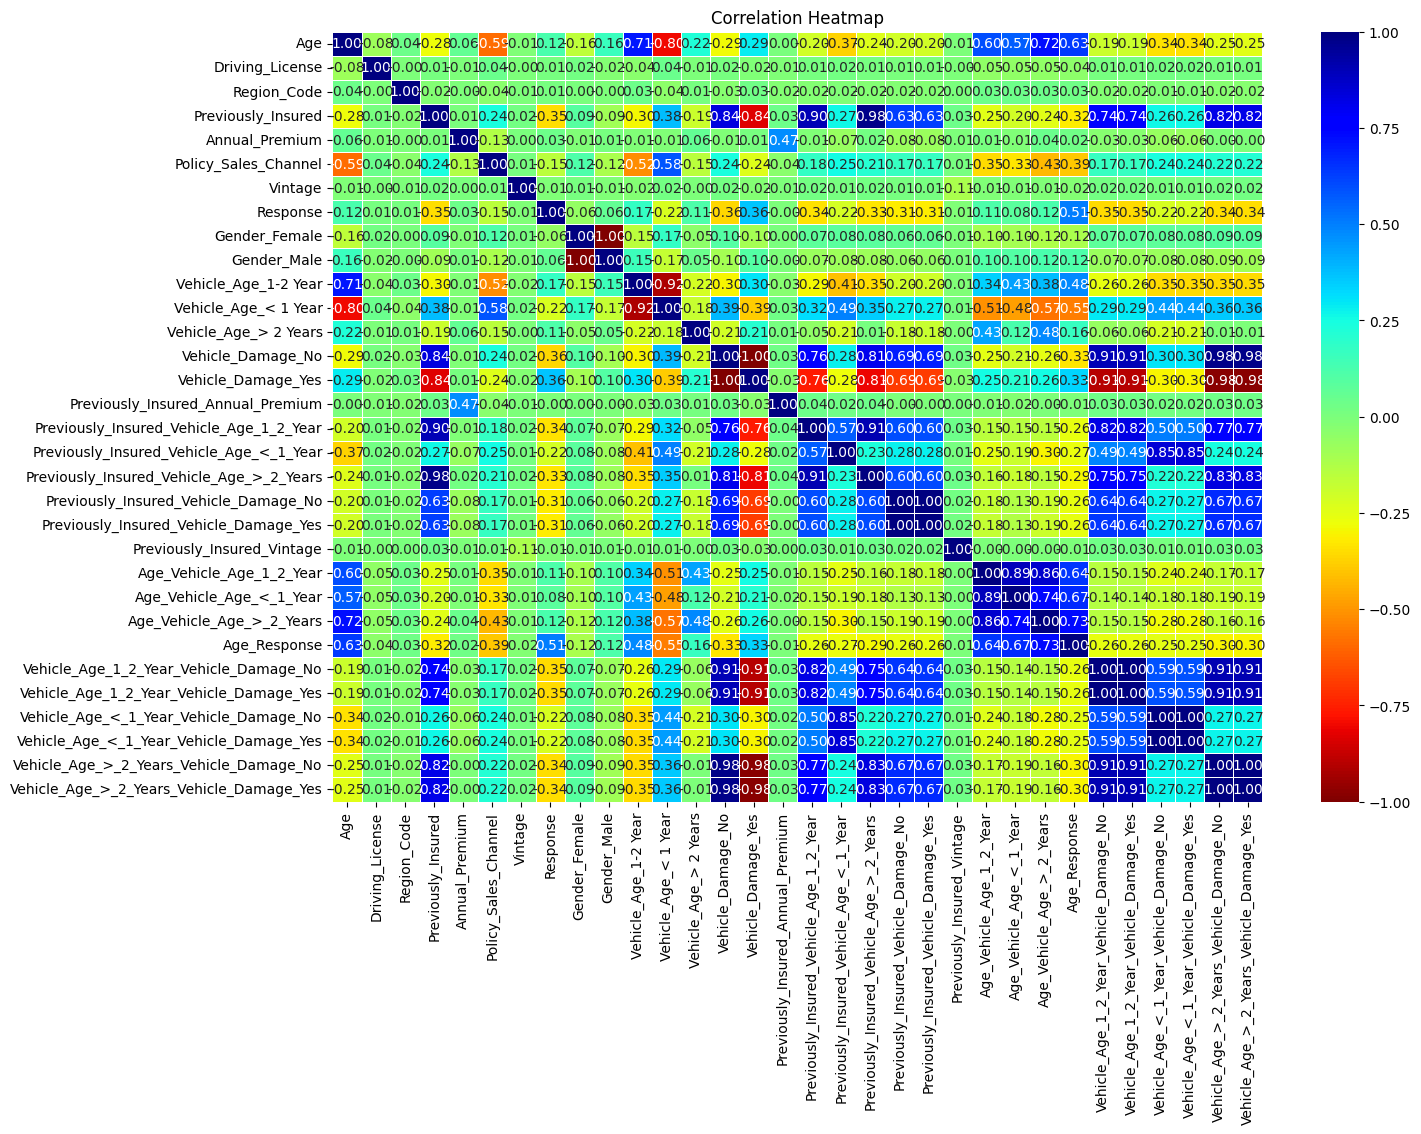

In [30]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.jet_r, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
train_df_cp=train_df

In [33]:
test_df_cp=test_df

In [34]:
corr_features = correlation(train_df_cp, 0.85)
len(set(corr_features))

10

In [35]:
corr_features

{'Age_Vehicle_Age_<_1_Year',
 'Age_Vehicle_Age_>_2_Years',
 'Previously_Insured_Vehicle_Age_1_2_Year',
 'Previously_Insured_Vehicle_Age_>_2_Years',
 'Previously_Insured_Vehicle_Damage_Yes',
 'Vehicle_Age_1_2_Year_Vehicle_Damage_No',
 'Vehicle_Age_1_2_Year_Vehicle_Damage_Yes',
 'Vehicle_Age_<_1_Year_Vehicle_Damage_Yes',
 'Vehicle_Age_>_2_Years_Vehicle_Damage_No',
 'Vehicle_Age_>_2_Years_Vehicle_Damage_Yes'}

In [36]:
train_df_cp.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,...,Age_Vehicle_Age_1_2_Year,Age_Vehicle_Age_<_1_Year,Age_Vehicle_Age_>_2_Years,Age_Response,Vehicle_Age_1_2_Year_Vehicle_Damage_No,Vehicle_Age_1_2_Year_Vehicle_Damage_Yes,Vehicle_Age_<_1_Year_Vehicle_Damage_No,Vehicle_Age_<_1_Year_Vehicle_Damage_Yes,Vehicle_Age_>_2_Years_Vehicle_Damage_No,Vehicle_Age_>_2_Years_Vehicle_Damage_Yes
0,21,1,35,0,65101,124,187,0,False,True,...,0,0,0,0,0,0,0,0,0,0
1,43,1,28,0,58911,26,288,1,False,True,...,1,1,1,1,1,1,0,0,1,1
2,25,1,14,1,38043,152,254,0,True,False,...,2,2,2,2,2,2,1,1,2,2
3,35,1,1,0,2630,156,76,0,True,False,...,3,3,3,3,0,0,0,0,0,0
4,36,1,15,1,31951,152,294,0,True,False,...,4,4,4,4,3,3,2,2,2,2


In [37]:
train_df_cp.drop(columns=corr_features, inplace=True)

In [38]:
test_df_cp.drop(columns=corr_features, inplace=True)

In [39]:
train_df_cp.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,...,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Previously_Insured_Annual_Premium,Previously_Insured_Vehicle_Age_<_1_Year,Previously_Insured_Vehicle_Damage_No,Previously_Insured_Vintage,Age_Vehicle_Age_1_2_Year,Age_Response,Vehicle_Age_<_1_Year_Vehicle_Damage_No
0,21,1,35,0,65101,124,187,0,False,True,...,False,False,True,0,0,0,0,0,0,0
1,43,1,28,0,58911,26,288,1,False,True,...,True,False,True,1,0,0,1,1,1,0
2,25,1,14,1,38043,152,254,0,True,False,...,False,True,False,2,1,1,2,2,2,1
3,35,1,1,0,2630,156,76,0,True,False,...,False,False,True,3,0,0,3,3,3,0
4,36,1,15,1,31951,152,294,0,True,False,...,False,True,False,4,2,1,4,4,4,2


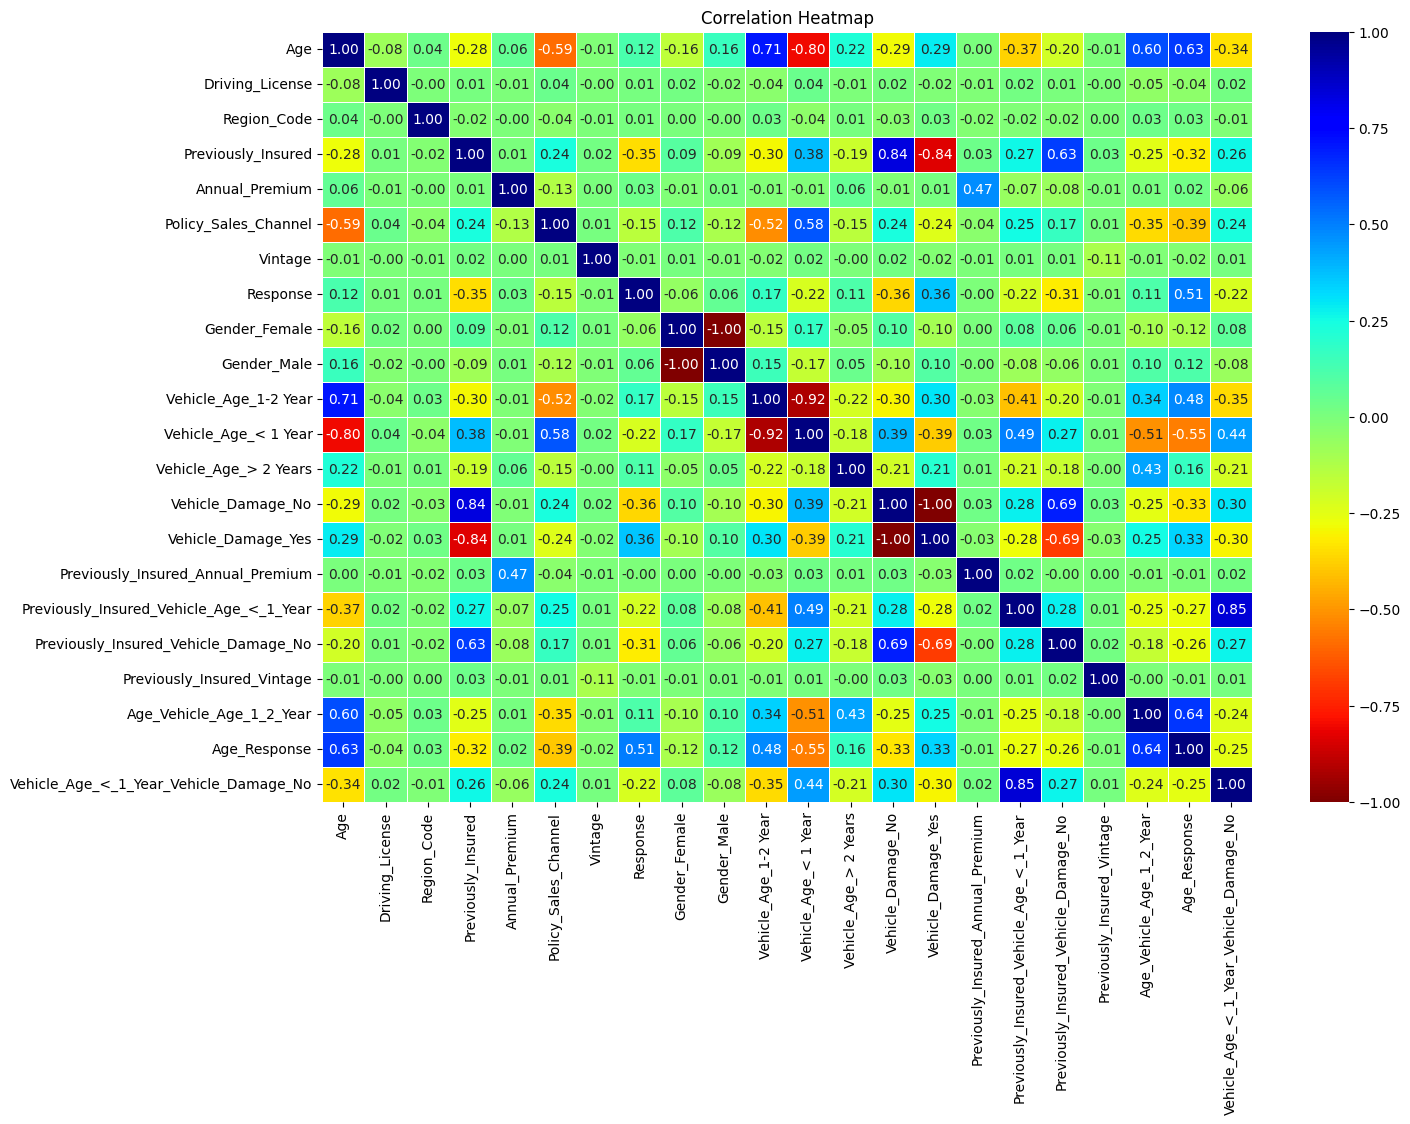

In [40]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(train_df_cp.corr(), annot=True, cmap=plt.cm.jet_r, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [41]:
train_df_cp.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
Age,38.397640,15.010549,20.0,24.0,36.0,49.0,85.0
Driving_License,0.998017,0.044486,0.0,1.0,1.0,1.0,1.0
Region_Code,26.417732,12.999299,0.0,15.0,28.0,35.0,52.0
Previously_Insured,0.462843,0.498617,0.0,0.0,0.0,1.0,1.0
Annual_Premium,30464.673611,16479.613681,2630.0,25256.0,31820.0,39450.0,540165.0
Policy_Sales_Channel,112.412900,54.041153,1.0,29.0,151.0,152.0,163.0
Vintage,163.591522,80.118209,10.0,98.0,166.0,232.0,299.0
Response,0.122983,0.328418,0.0,0.0,0.0,0.0,1.0
Previously_Insured_Annual_Premium,17035.149900,18331.416687,0.0,1921.0,10967.0,26460.0,98150.0
Previously_Insured_Vehicle_Age_<_1_Year,1.056808,1.062024,0.0,0.0,1.0,2.0,3.0


In [42]:
train_df_cp.nunique().sort_values()

Driving_License                                2
Previously_Insured                             2
Response                                       2
Vehicle_Age_> 2 Years                          2
Vehicle_Age_< 1 Year                           2
Vehicle_Age_1-2 Year                           2
Gender_Male                                    2
Gender_Female                                  2
Vehicle_Damage_Yes                             2
Vehicle_Damage_No                              2
Previously_Insured_Vehicle_Damage_No           4
Previously_Insured_Vehicle_Age_<_1_Year        4
Vehicle_Age_<_1_Year_Vehicle_Damage_No         4
Region_Code                                   53
Age                                           66
Age_Vehicle_Age_1_2_Year                     130
Age_Response                                 130
Policy_Sales_Channel                         156
Vintage                                      290
Previously_Insured_Vintage                   580
Annual_Premium      

In [43]:
feature_list = [feature for feature in train_df_cp.columns if not feature  == "Response"]

target = "Response"

descrete_features = new_features = [
    'iddx_5',
    'image_type',
    'target',
    'tbp_tile_type',
    'sex',
    'copyright_license',
    'iddx_1'
]
continuous_features = list(set(feature_list) - set(descrete_features))

assert feature_list.sort() == (continuous_features + descrete_features).sort()

In [44]:
eda_df = train_df_cp.sample(frac= 0.01)

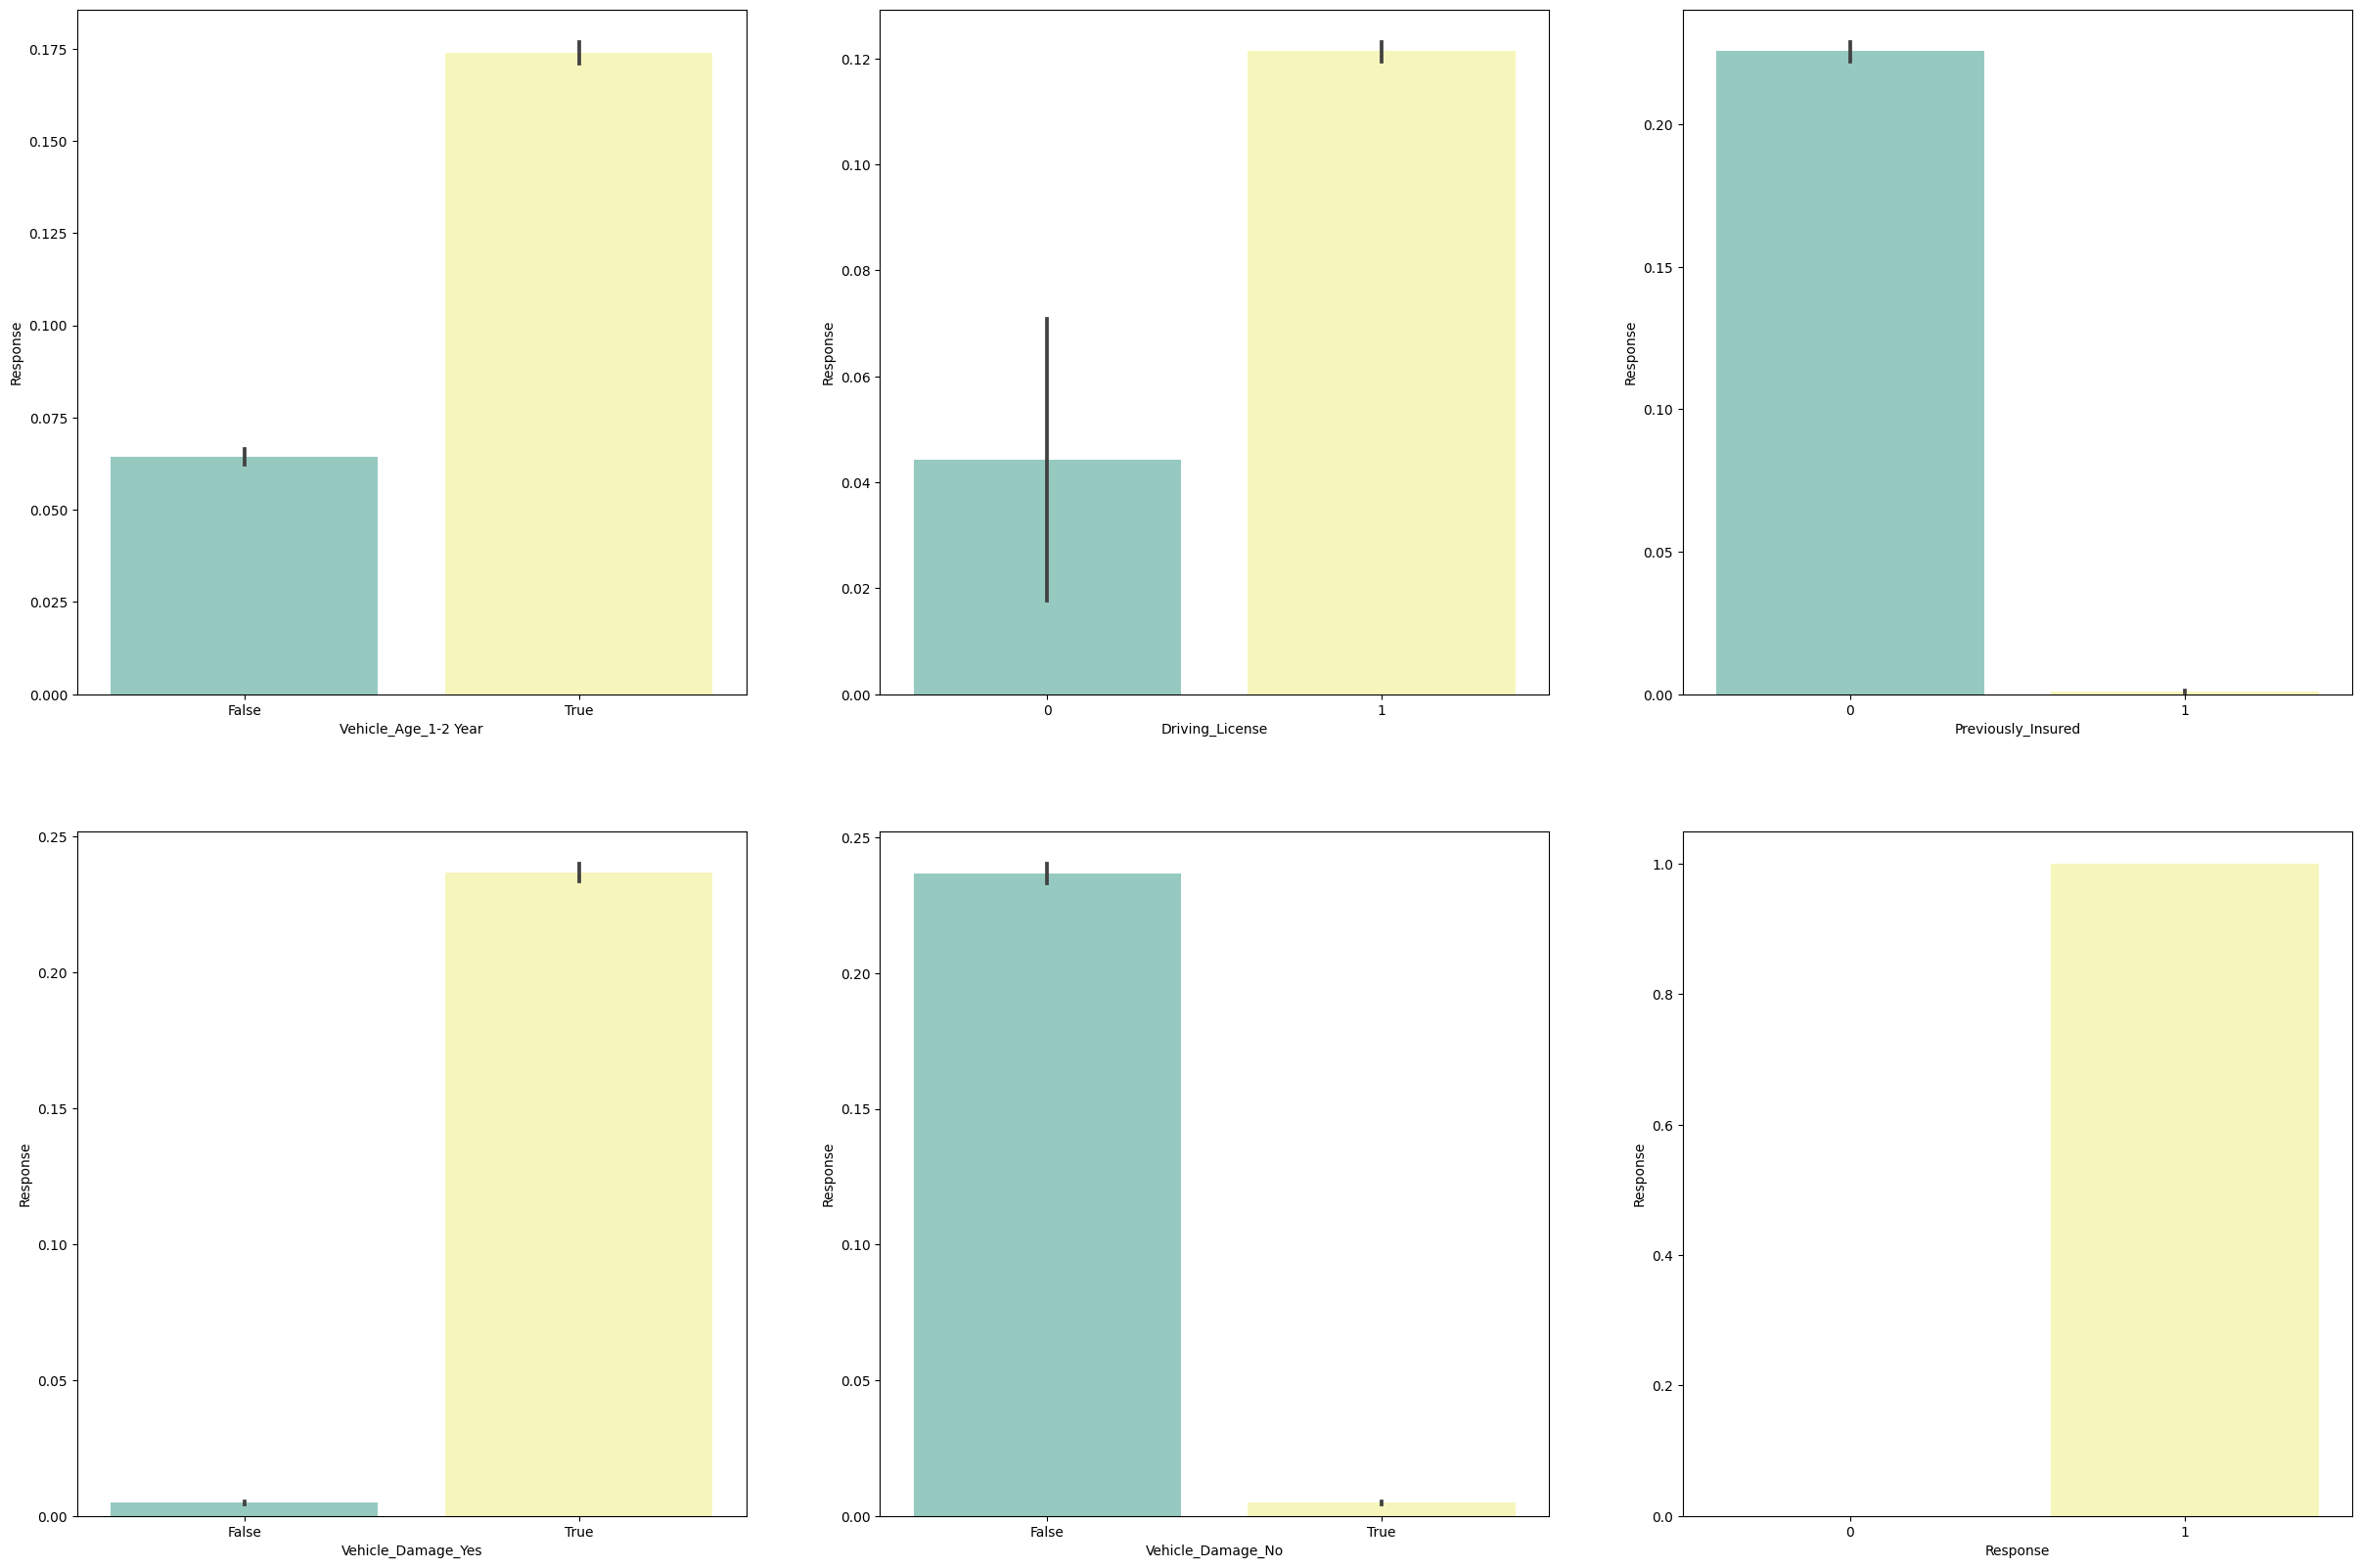

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for var, subplot in zip(descrete_features, ax.flatten()):
    sns.barplot(x= var, y= 'Response', data=eda_df, ax=subplot, palette='Set3')

In [46]:
from sklearn.feature_selection import mutual_info_classif

In [47]:
mutual_df = eda_df[feature_list]
y_sampled = eda_df.Response
mutual_info = mutual_info_classif(mutual_df, y_sampled, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
Age_Response,0.118102
Previously_Insured_Vehicle_Damage_No,0.095645
Vehicle_Damage_No,0.093193
Previously_Insured,0.092149
Vehicle_Damage_Yes,0.088749
Vehicle_Age_< 1 Year,0.035852
Age,0.033953
Policy_Sales_Channel,0.025747
Vehicle_Age_1-2 Year,0.025079
Driving_License,0.022726


In [48]:
train_df_ncp = train_df_cp.drop(columns='Previously_Insured_Annual_Premium')

In [49]:
test_df_ncp = test_df_cp.drop(columns='Previously_Insured_Annual_Premium')

In [50]:
train_df_ncp['Gender_Vehicle_Damage'] = pd.factorize(train_df_ncp['Gender_Female'].astype(str) + train_df_ncp['Vehicle_Damage_No'].astype(str))[0]

train_df_ncp['Age_Vehicle_Age'] = train_df_ncp['Age'] * train_df_ncp['Vehicle_Age_< 1 Year']
train_df_ncp['Age_Vehicle_Age'] = pd.factorize(train_df_ncp['Age_Vehicle_Age'].astype(str))[0]

train_df_ncp['Previously_Insured_Policy_Sales_Channel'] = pd.factorize(train_df_ncp['Previously_Insured'].astype(str) + train_df_ncp['Policy_Sales_Channel'].astype(str))[0]

train_df_ncp['Annual_Premium_Age'] = train_df_ncp['Annual_Premium'] * train_df_ncp['Age']
train_df_ncp['Annual_Premium_Age'] = pd.factorize(train_df_ncp['Annual_Premium_Age'].astype(str))[0]

In [51]:
test_df_ncp['Gender_Vehicle_Damage'] = pd.factorize(test_df_ncp['Gender_Female'].astype(str) + test_df_ncp['Vehicle_Damage_No'].astype(str))[0]

test_df_ncp['Age_Vehicle_Age'] = test_df_ncp['Age'] * test_df_ncp['Vehicle_Age_< 1 Year']
test_df_ncp['Age_Vehicle_Age'] = pd.factorize(test_df_ncp['Age_Vehicle_Age'].astype(str))[0]

test_df_ncp['Previously_Insured_Policy_Sales_Channel'] = pd.factorize(test_df_ncp['Previously_Insured'].astype(str) + test_df_ncp['Policy_Sales_Channel'].astype(str))[0]

test_df_ncp['Annual_Premium_Age'] = test_df_ncp['Annual_Premium'] * test_df_ncp['Age']
test_df_ncp['Annual_Premium_Age'] = pd.factorize(test_df_ncp['Annual_Premium_Age'].astype(str))[0]


In [52]:
feature_list = [feature for feature in train_df_ncp.columns if not feature  == "Response"]

target = "Response"

descrete_features = [
    'Vehicle_Age_1-2 Year',
    'Driving_License',
    'Previously_Insured',
    'Vehicle_Damage_Yes',
    'Vehicle_Damage_No',
    'Response',
    'Gender_Female',
    'Gender_Male',
    'Vehicle_Age_> 2 Years',
    'Vehicle_Age_< 1 Year'
]
continuous_features = list(set(feature_list) - set(descrete_features))

assert feature_list.sort() == (continuous_features + descrete_features).sort()

In [53]:
eda_df = train_df_ncp.sample(frac= 0.02)

In [54]:
mutual_df = eda_df[feature_list]
y_sampled = eda_df.Response
mutual_info = mutual_info_classif(mutual_df, y_sampled, random_state=42)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
Age_Response,0.123303
Vehicle_Damage_No,0.110360
Previously_Insured,0.105917
Previously_Insured_Vehicle_Damage_No,0.101239
Vehicle_Damage_Yes,0.099469
Vehicle_Age_< 1 Year,0.047388
Driving_License,0.044004
Gender_Vehicle_Damage,0.043516
Policy_Sales_Channel,0.043339
Age,0.040575


In [55]:
train_df_ncp.drop(columns=['Annual_Premium_Age','Previously_Insured_Policy_Sales_Channel'])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,...,Vehicle_Damage_No,Vehicle_Damage_Yes,Previously_Insured_Vehicle_Age_<_1_Year,Previously_Insured_Vehicle_Damage_No,Previously_Insured_Vintage,Age_Vehicle_Age_1_2_Year,Age_Response,Vehicle_Age_<_1_Year_Vehicle_Damage_No,Gender_Vehicle_Damage,Age_Vehicle_Age
0,21,1,35,0,65101,124,187,0,False,True,...,False,True,0,0,0,0,0,0,0,0
1,43,1,28,0,58911,26,288,1,False,True,...,False,True,0,0,1,1,1,0,0,0
2,25,1,14,1,38043,152,254,0,True,False,...,True,False,1,1,2,2,2,1,1,1
3,35,1,1,0,2630,156,76,0,True,False,...,False,True,0,0,3,3,3,0,2,0
4,36,1,15,1,31951,152,294,0,True,False,...,True,False,2,1,4,4,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26,1,30170,26,88,0,False,True,...,True,False,2,1,488,93,47,2,3,0
381105,30,1,37,1,40016,152,131,0,False,True,...,True,False,1,1,380,26,27,1,3,10
381106,21,1,30,1,35118,160,161,0,False,True,...,True,False,1,1,240,42,0,1,3,15
381107,68,1,14,0,44617,124,74,0,True,False,...,False,True,0,0,103,99,65,0,2,0


In [56]:
test_df_ncp.drop(columns=['Annual_Premium_Age','Previously_Insured_Policy_Sales_Channel'])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,...,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Previously_Insured_Vehicle_Age_<_1_Year,Previously_Insured_Vehicle_Damage_No,Previously_Insured_Vintage,Age_Vehicle_Age_1_2_Year,Vehicle_Age_<_1_Year_Vehicle_Damage_No,Gender_Vehicle_Damage,Age_Vehicle_Age
0,20,1,47,0,2630,160,228,True,False,False,...,False,True,False,0,0,0,0,0,0,0
1,47,1,28,0,37483,124,123,False,True,True,...,False,False,True,1,1,1,1,1,1,1
2,47,1,43,0,2630,26,271,False,True,True,...,False,False,True,1,1,2,1,1,1,1
3,22,1,47,1,24502,152,115,True,False,False,...,False,True,False,2,2,3,2,0,0,2
4,51,1,19,0,34115,124,148,False,True,True,...,False,True,False,1,0,4,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,26,1,37,1,30867,152,56,True,False,False,...,False,True,False,2,2,371,32,0,0,11
127033,38,1,28,0,28700,122,165,True,False,True,...,False,False,True,1,1,74,45,1,3,1
127034,21,1,46,1,29802,152,74,False,True,False,...,False,True,False,2,2,102,5,0,2,4
127035,71,1,28,1,62875,26,265,False,True,True,...,False,True,False,3,2,314,47,2,2,1


In [57]:
train_df_ncp.shape,test_df_ncp.shape

((11885907, 25), (7796903, 23))

In [58]:
train_df_ncp.drop(columns=['Age_Response'],inplace=True)

In [59]:
train_df_ncp.shape,test_df_ncp.shape

((11885907, 24), (7796903, 23))

In [60]:
from catboost import CatBoostClassifier, Pool
import numpy as np
import pandas as pd
import polars as pl
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.simplefilter('ignore')

In [61]:
train_df_ncp = train_df_ncp.reset_index(drop=True)
test_df_ncp = test_df_ncp.reset_index(drop=True)

In [62]:
aucs = []
preds = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df_ncp, train_df_ncp['Response'])):
    print(f'### Fold {fold+1} Training ###')

    X_train = train_df_ncp.loc[train_idx, [c for c in train_df_ncp.columns if c not in ['id', 'Response']]]
    y_train = train_df_ncp.loc[train_idx, 'Response']
    X_valid = train_df_ncp.loc[valid_idx, X_train.columns]
    y_valid = train_df_ncp.loc[valid_idx, 'Response']
    X_test = test_df_ncp[X_train.columns]

    X_train_pool = Pool(X_train, y_train, cat_features=X_train.columns.values)
    X_valid_pool = Pool(X_valid, y_valid, cat_features=X_valid.columns.values)
    X_test_pool = Pool(X_test, cat_features=X_test.columns.values)

    model = CatBoostClassifier(
        loss_function='Logloss',
        eval_metric='AUC',
        learning_rate=0.05,
        iterations=5000,
        depth=9,
        random_strength=0,
        l2_leaf_reg=0.5,
        task_type='GPU',
        random_seed=42,
        verbose=False
    )

    model.fit(X=X_train_pool, eval_set=X_valid_pool, verbose=1000, early_stopping_rounds=200)

    pred_valid = model.predict_proba(X_valid_pool)[:, 1]
    preds.append(model.predict_proba(X_test_pool)[:, 1])

    auc = roc_auc_score(y_valid, pred_valid)
    aucs.append(auc)

    print(f'Fold {fold+1} AUC: {auc:.5f}\n')

print(f'\nOverall AUC: {np.mean(aucs):.5f} +/- {np.std(aucs):.5f}')

### Fold 1 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8754827	best: 0.8754827 (0)	total: 1.61s	remaining: 2h 14m 2s
1000:	test: 0.8946788	best: 0.8946788 (999)	total: 37m 6s	remaining: 2h 28m 16s
2000:	test: 0.8950797	best: 0.8950797 (2000)	total: 1h 15m 1s	remaining: 1h 52m 27s
3000:	test: 0.8952295	best: 0.8952299 (2995)	total: 1h 53m 20s	remaining: 1h 15m 30s
4000:	test: 0.8953062	best: 0.8953068 (3976)	total: 2h 31m 18s	remaining: 37m 46s
bestTest = 0.895352006
bestIteration = 4715
Shrink model to first 4716 iterations.


In [1]:
print('hello')

hello
